In [1]:
from ffast import load

tokeniser = load()

[nltk_data] Downloading package stopwords to /Users/mohammedterry-
[nltk_data]     jack/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mohammedterry-
[nltk_data]     jack/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Token IDs

In [2]:
outputs = tokeniser.encode("this is a test")
outputs.ids

/Users/mohammedterry-jack/testground/lib/python3.9/site-packages/scipy/stats/stats.py:275: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


[117797, 117730, 117659, 105137]

In [3]:
outputs = tokeniser.decode([117797, 117730, 117659, 105134])
str(outputs)

'this is a test'

### Other Information

In [4]:
outputs


        text = this
        morphology = this
        phonology = 0S
        id = 117797
        tag = <StopWord>
        similar = set()
        opposite = set()
        related = set()
        semantics = set()
        definition = None
        example = None
        

        text = is
        morphology = is
        phonology = IS
        id = 117730
        tag = <StopWord>
        similar = set()
        opposite = set()
        related = set()
        semantics = set()
        definition = None
        example = None
        

        text = a
        morphology = a
        phonology = A
        id = 117659
        tag = <StopWord>
        similar = set()
        opposite = set()
        related = set()
        semantics = set()
        definition = None
        example = None
        

        text = test
        morphology = test
        phonology = TST
        id = 105134
        tag = Verb
        similar = set()
        opposite = set()
        related = set()
        sema

### Compound words (e.g. 'big shot')

In [5]:
tokeniser.encode("the big shot")

/Users/mohammedterry-jack/testground/lib/python3.9/site-packages/nltk/corpus/reader/wordnet.py:599: UserWarning: Discarded redundant search for Synset('physical_entity.n.01') at depth 8
  for synset in acyclic_breadth_first(self, rel, depth):



        text = the
        morphology = the
        phonology = 0
        id = 117788
        tag = <StopWord>
        similar = set()
        opposite = set()
        related = set()
        semantics = set()
        definition = None
        example = None
        

        text = big shot
        morphology = big shot
        phonology = BK XT
        id = 11031
        tag = Noun
        similar = {'big_wheel', 'big_deal', 'big_shot', 'head_honcho', 'big_gun', 'big_cheese', 'big_enchilada', 'big_fish'}
        opposite = set()
        related = {'supremo', 'knocker', 'colloquialism'}
        semantics = {'person.n.01', 'adult.n.01', 'entity.n.01', 'important_person.n.01', 'living_thing.n.01', 'whole.n.02', 'physical_entity.n.01', 'object.n.01', 'organism.n.01', 'causal_agent.n.01'}
        definition = an important influential person
        example = he thinks he's a big shot; she's a big deal in local politics; the Qaeda commander is a very big fish
        

### Filtering tokens (i.e. for Entity Extraction) 

In [6]:
outputs = tokeniser.encode("i will fly to the nasa space station now redfox")
str(outputs)

'i will fly to the nasa space station now redfox'

In [10]:
list(map(str,outputs.tokens))

['i', 'will', 'fly', 'to', 'the', 'nasa', 'space station', 'now', 'redfox']

In [11]:
str(outputs.skip_unknowns())

'i will fly to the nasa space station now'

In [12]:
str(outputs.skip_stopwords())

'fly nasa space station redfox'

In [13]:
str(outputs.nouns())

'nasa space station'

In [14]:
str(outputs.verbs())

'fly'

In [15]:
str(outputs.entities())

'fly nasa space station redfox'

### Disambiguation (e.g. "fast")

In [16]:
tokeniser.encode("fast from food in Ramadan")[0]


        text = fast
        morphology = fast
        phonology = FST
        id = 38980
        tag = Noun
        similar = {'fasting'}
        opposite = set()
        related = {'Ramadan', 'diet', 'hunger_strike', 'dieting'}
        semantics = {'entity.n.01', 'event.n.01', 'self-denial.n.02', 'psychological_feature.n.01', 'control.n.05', 'abstinence.n.02', 'act.n.02', 'activity.n.01', 'abstraction.n.06'}
        definition = abstaining from food
        example = 
        

In [17]:
tokeniser.encode("i'm going too fast")[-1]


        text = fast
        morphology = fast
        phonology = FST
        id = 41354
        tag = Adjective
        similar = {'quick', 'flying'}
        opposite = set()
        related = {'hurried'}
        semantics = set()
        definition = hurried and brief
        example = paid a flying visit; took a flying glance at the book; a quick inspection; a fast visit
        

### Paraphrasing Permutations

In [18]:
for variant in tokeniser.encode("he is a big shot").paraphrase():
    print(variant)

he is a big_wheel 
he is a big_deal 
he is a big_shot 
he is a head_honcho 
he is a big_gun 
he is a big_cheese 
he is a big_enchilada 
he is a big_fish 
he is a big shot


### Fast Token Comparisons 

In [19]:
tuna = tokeniser.encode("tuna")[0]
tuna


        text = tuna
        morphology = tuna
        phonology = TN
        id = 108939
        tag = Noun
        similar = {'Anguilla_sucklandii'}
        opposite = set()
        related = set()
        semantics = {'entity.n.01', 'teleost_fish.n.01', 'living_thing.n.01', 'whole.n.02', 'animal.n.01', 'chordate.n.01', 'physical_entity.n.01', 'fish.n.01', 'soft-finned_fish.n.01', 'eel.n.02', 'vertebrate.n.01', 'bony_fish.n.01', 'object.n.01', 'aquatic_vertebrate.n.01', 'organism.n.01'}
        definition = New Zealand eel
        example = 
        

In [20]:
tokens = tokeniser.encode("i ate fish and chips on the weekend")[:]
tuna.most_similar(tokens)


        text = fish and chips
        morphology = fish and chip
        phonology = FX ANT XP
        id = 40416
        tag = Noun
        similar = {'fish_and_chips'}
        opposite = set()
        related = set()
        semantics = {'entity.n.01', 'matter.n.03', 'physical_entity.n.01', 'dish.n.02', 'substance.n.07', 'food.n.01', 'nutriment.n.01'}
        definition = fried fish and french-fried potatoes
        example = 
        

### Lightweight Contextual Sentence Embeddings (dot similarity)

In [22]:
outputs = tokeniser.encode("this is a test")
outputs.vector.shape

(1178620,)

In [23]:
best = outputs.most_similar([
    tokeniser.encode("test this is"),
    tokeniser.encode("this is an exam"),
    tokeniser.encode("bla bla bla food")
])
str(best)

'this is an exam'

In [24]:
best = tokeniser.encode("How big is London").most_similar([
    tokeniser.encode("London has 9,787,426 inhabitants at the 2011 census"),
    tokeniser.encode("London is known for its financial district"),
])
str(best)

/Users/mohammedterry-jack/testground/lib/python3.9/site-packages/nltk/corpus/reader/wordnet.py:599: UserWarning: Discarded redundant search for Synset('physical_entity.n.01') at depth 6
  for synset in acyclic_breadth_first(self, rel, depth):


'London has 9,787,426 inhabitants at the 2011 census'

### Want smaller vectors?

In [26]:
outputs.projection().shape

(100,)

In [31]:
from matplotlib.pyplot import imshow

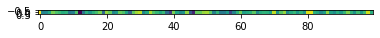

In [32]:
imshow([outputs.projection()])